Try writing an “even-odd vending machine,” which will take a number as input and do two things: 1. Print whether the number is even or odd. 2. Display the number followed by the next 9 even or odd numbers. If the input is 2, the program should print even and then print 2, 4, 6, 8, 10, 12, 14, 16, 18, 20. Similarly, if the input is 1, the program should print odd and then print 1, 3, 5, 7, 9, 11, 13, 15, 17, 19. 22   Chapter 1Your program should use the is_integer() method to display an error message if the input is a number with significant digits beyond the decimal point.

In [1]:
def even_odd_v_m(num):
    if num % 2 == 0:
        print("even")
    else:
        print("odd")
    for i in range(0, 20, 2):
        print(num + i) 

In [2]:
even_odd_v_m(2)

even
2
4
6
8
10
12
14
16
18
20


In [3]:
even_odd_v_m(1)

odd
1
3
5
7
9
11
13
15
17
19


-----

Your programming challenge is to enhance this program to create a graph of the function. Try using at least 10 values for x instead of the 6 above. Calculate the corresponding y values using the function and then create a graph using these two sets of values. Once you’ve created the graph, spend some time analyzing how the value of y varies with respect to x. Is the variation linear or nonlinear?

In [73]:
import matplotlib.pyplot as plt

In [74]:
def quad_calc():
    x_values = [-12, -10,-8,-6, -4, -2, 0, 2, 4, 6, 8, 10]
    y_values = []
    for x in x_values:
        y_values.append(x**2 + x * 2 + 1)
    draw_graph(x_values, y_values)

In [75]:
def draw_graph(x, y):
    plt.plot(x, y ,marker='*')
    plt.xlabel('x')

    plt.ylabel('y')
    plt.title('Quadratic Equation')

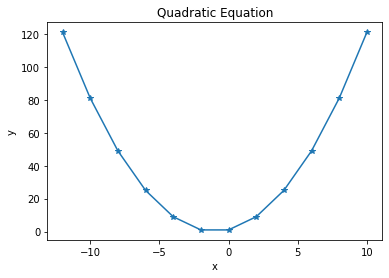

In [76]:
quad_calc()

The variation is nonlinear.


---

Implement a statistics calculator that takes a list of numbers in the file mydata.txt and then calculates and prints their mean, median, mode, variance, and standard deviation using the functions we wrote earlier in this chapter.

In [120]:
import csv 
import matplotlib.pyplot as plt

In [121]:
numbers = [1, 2, 3, 3, 5]

In [134]:
def read_data(filename): 
    numbers = []    
    squared = []    
    with open(filename) as f:         
        reader = csv.reader(f) 
        next(reader)
        for row in reader: 
            numbers.append(int(row[0]))
            squared.append(int(row[1]))
            
    return numbers, squared
#only knew how to do this from the textbook

In [135]:
def meancalc(numbers):
    s = sum(numbers)
    n = len(numbers)
    mean = s / n

    return mean

In [136]:
def mediancalc(numbers):

    n = len(numbers)
    numbers.sort()

    if n % 2 == 0:
        med1 = int(n / 2) - 1
        med2 = int((n / 2) + 1) - 1
        median = (numbers[med1] + numbers[med2]) / 2
    else:
        med = int((n + 1) / 2) - 1
        median = numbers[med]

    return median


In [137]:
from collections import Counter

In [138]:
def modecalc(numbers):
    c = Counter(numbers)
    numbers_freq = c.most_common()

    max_count = numbers_freq[0][1]

    mode = []
    for num in numbers_freq:
        if num[1] == max_count:
            mode.append(num[0])

    return mode

In [139]:
def diffcalc(numbers):
    mean = meancalc(numbers)
    diff = []
    for num in numbers:
        diff.append(num - mean)

    return diff

In [140]:
def variancecalc(numbers):
    diff = diffcalc(numbers)
    squared_diff = []

    for d in diff:
        squared_diff.append(d**2)
    sum_squared_diff = sum(squared_diff)

    variance = sum_squared_diff / len(numbers)

    return variance

In [154]:
if __name__ == '__main__':
    data = read_data('mydata.txt')
    mean = meancalc(data)
    median = mediancalc(data)
    mode = modecalc(data)
    variance = variancecalc(data)
    std_ev = variance**0.5
    print('Mean: {0}, Median {1}, Mode {2}'.format(mean, median, mode))
    print('Variance: {0}, Standard Deviation: {1}'.format(variance, std_ev))

Mean: 2.8, Median 3.0, Mode [3.0]
Variance: 1.7600000000000002, Standard Deviation: 1.32664991614216


---

For this challenge, create a function, isolve(), that will take any inequality, solve it, and then return the solution. 

In [159]:
from sympy import Poly, Symbol, solve_poly_inequality 
x = Symbol('x') 
ineq_obj = -x**2 + 4 < 0 
lhs = ineq_obj.lhs
p = Poly(lhs, x) 
rel = ineq_obj.rel_op
solve_poly_inequality(p, rel) 
[(-oo, -2), (2, oo)]

NameError: name 'oo' is not defined

---

Your challenge in this task is to verify this law when rolling a six-sided die for the following number of trials: 100, 1000, 10000, 100000, and 500000

Here’s an expected sample run of your complete program:
Expected value: 3.5
Trials: 100 Trial average 3.72
Trials: 1000 Trial average 3.603
Trials: 10000 Trial average 3.4842
Trials: 10000 Trial average 3.4774
Trials: 100000 Trial average 3.50189
Trials: 500000 Trial average 3.495468

In [162]:
import random as random

In [169]:
def dietoss(numoftosses):
    sum = 0
    for toss in range(numoftosses):
        sum += random.randint(1,6)
    return sum / numoftosses

In [172]:
if __name__ == '__main__':
    trials = [100, 1000, 10000, 10000, 100000, 500000]
    print('Expected value: 3.5')
    for trial in trials:
        avg = dietoss(trial)
        print('Trials: {0} Trial average {1}'.format(trial, avg))

Expected value: 3.5
Trials: 100 Trial average 3.53
Trials: 1000 Trial average 3.511
Trials: 10000 Trial average 3.4929
Trials: 10000 Trial average 3.4717
Trials: 100000 Trial average 3.49018
Trials: 500000 Trial average 3.499956


---

Your challenge is to implement a generic program using the gradient descent algorithm to find the minimum value of a single-variable function specified as input by the user. The program should also create a graph of the function and show all the intermediate values it found before finding the minimum.